In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("algerian_forest_fires_dataset_cleaned.csv")
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   243 non-null    int64  
 1   day          243 non-null    int64  
 2   month        243 non-null    int64  
 3   year         243 non-null    int64  
 4   Temperature  243 non-null    int64  
 5   RH           243 non-null    int64  
 6   Ws           243 non-null    int64  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    int64  
 15  Region       243 non-null    int64  
dtypes: float64(7), int64(9)
memory usage: 30.5 KB


In [5]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   243 non-null    int64  
 1   Temperature  243 non-null    int64  
 2   RH           243 non-null    int64  
 3   Ws           243 non-null    int64  
 4   Rain         243 non-null    float64
 5   FFMC         243 non-null    float64
 6   DMC          243 non-null    float64
 7   DC           243 non-null    float64
 8   ISI          243 non-null    float64
 9   BUI          243 non-null    float64
 10  FWI          243 non-null    float64
 11  Classes      243 non-null    int64  
 12  Region       243 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 24.8 KB


In [7]:
X=df.drop(['FWI'],axis=1)
y=df['FWI']

In [8]:
X.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
X_train.shape

(182, 12)

<Axes: >

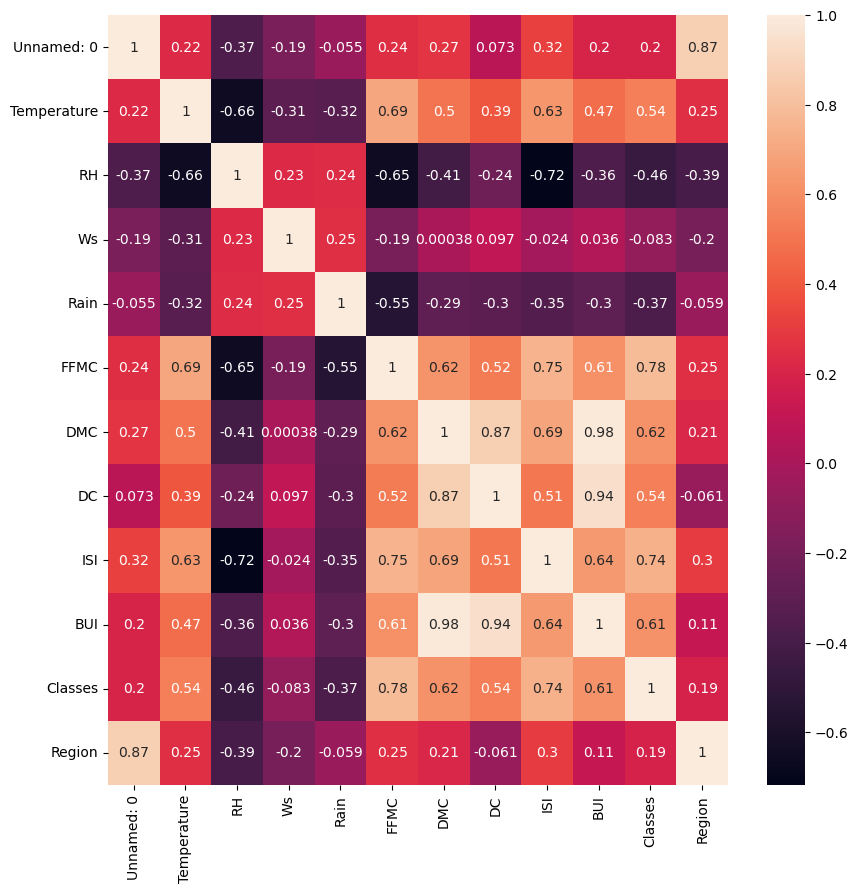

In [11]:
plt.figure(figsize=(10,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [12]:
def correlation(dataset,threshold):
    col_cor = set()
    corr_mat = dataset.corr()
    for i in range(len(corr_mat.columns)):
        for j in range (i):
            if abs(corr_mat.iloc[i,j])> threshold:
                col_cor.add(corr_mat.columns[i])
    return col_cor

In [13]:
co=correlation(X_train,0.85)
co.discard('Region')

In [14]:
co

{'BUI', 'DC'}

In [15]:
X_train.drop(co,axis=1,inplace=True)
X_test.drop(co,axis=1,inplace=True)
X_test.shape,X_train.shape

((61, 10), (182, 10))

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

In [17]:
X_train_sc

array([[-0.3353872 , -0.84284248,  0.78307967, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [ 0.29670993, -0.30175842,  0.64950844, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 1.02936798,  2.13311985, -2.08870172, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-0.40721642, -1.9250106 ,  0.9166509 , ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.842612  ,  0.50986767, -0.21870454, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.26355798, -0.57230045,  0.98343651, ..., -0.86113478,
        -1.10431526, -0.98907071]])

Text(0.5, 1.0, 'X train after scaling')

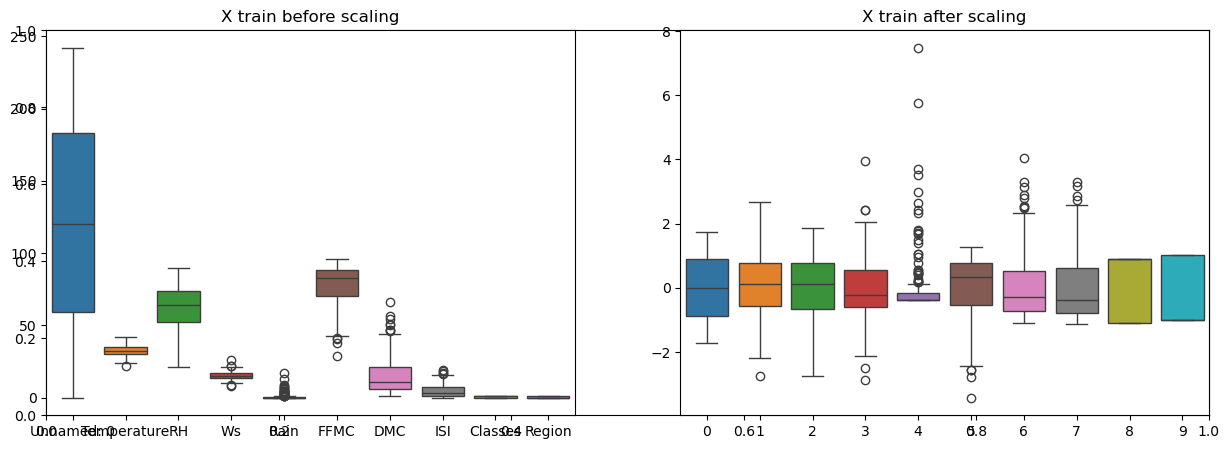

In [18]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title("X train before scaling")
plt.subplot(1,2,2)
sns.boxplot(X_train_sc)
plt.title("X train after scaling")

Mean absolute error  0.5735754635079926
R2 score  0.9840362584269214


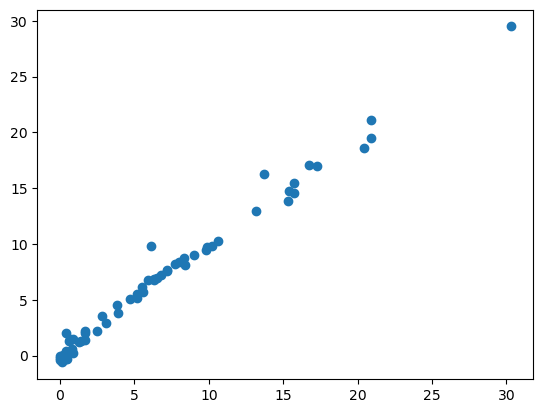

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linear = LinearRegression()
linear.fit(X_train,y_train)
y_pred = linear.predict(X_test)
mae= mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error ", mae)
print("R2 score ", score)
plt.scatter(y_test,y_pred)

In [20]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,r2_score
ridge = RidgeCV(cv=5)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
mae= mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error ", mae)
print("R2 score ", score)

Mean absolute error  0.5475302743719133
R2 score  0.9838417461065259


In [21]:
import pickle 
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('model.pkl','wb'))